# Introduction à l'apprentissage automatique - TP5 exercice 1

### SVM sur données synthétiques

<br> 

Prenez connaissance de la [documentation scikit-learn sur les SVM](http://scikit-learn.org/stable/modules/svm.html).

On utilisera la [classe SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Notez la valeur par défaut de l'hyperparamètre $C$, et les fonctions noyau disponibles (ainsi que leurs paramètres).

<br>

Dans les questions suivantes, vous séparerez les bases de données
entre bases d'apprentissage (80% de la base initiale) et base de test (20%) et calculerez un score de
classification sur la base de test.

<br>

On commence par charger les bibliothèques utiles et définir une fonction de visualisation:

In [2]:
from sklearn import datasets, model_selection, preprocessing, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize

%matplotlib inline

def plot_classif_result_SVM(X,y,clf,title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    
    cmap2 = ListedColormap(['#FF8888', '#FFAAAA', '#AAFFAA', '#88FF88'])  
    
    h=0.01 # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Zdf = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Zdfbin = (np.abs(Zdf)<=1)   # 0 if inside margin,  1 if outside 
    Color=np.zeros(Z.shape)  # colors for each region 
    for i in range(len(Z)):
        if (Z[i]):
            if Zdfbin[i]: Color[i]=2
            else: Color[i]=3
        else:
            if Zdfbin[i]: Color[i]=1 
            else: Color[i]=0
                
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Color = Color.reshape(xx.shape)    
    plt.figure(figsize=[12,6])
    plt.pcolormesh(xx, yy, Color, cmap=cmap2)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    # Plot the support vectors:
    plt.scatter(X[clf.support_, 0], X[clf.support_, 1], c=y[clf.support_], cmap=cmap_bold,edgecolor='k',s=80, marker='*')    
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show();


Commencez par un jeu de données de 1000 points dans deux classes linéairement séparables, obtenu avec `make_blobs` (cf [exercice 1 du TP3](https://members.loria.fr/FSur/enseignement/apprauto/TP3_ex1_sujet.html)). 

Entraînez une SVM à noyau linéaire, et visualisez les vecteurs supports à l'aide de la fonction `plot_classif_result_SVM`.

Affichez également le score de classification sur la base test, ainsi que le nombre de vecteurs supports pour chaque classe.

Même question avec deux classes non séparables (augmentez la valeur de `cluster_std` dans `make_blobs`).

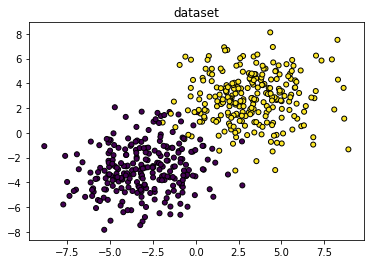

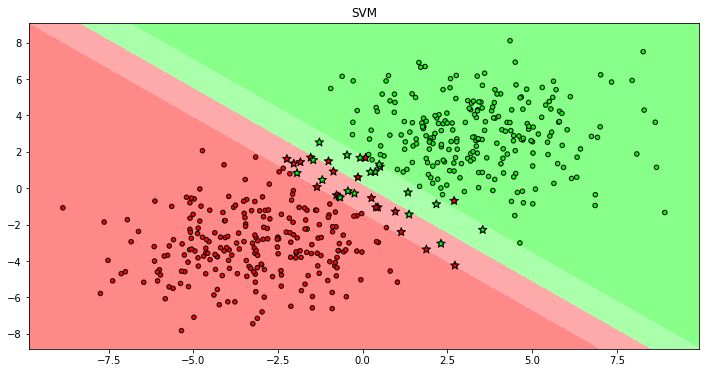

score 1-NN 0.98
[19 18]


In [46]:
# votre code ici
X_train, Y_train = datasets.make_blobs(n_samples = 500, n_features=2, centers=[(-3, -3), (3, 3)], cluster_std=2.0)  # c'est ici qu'il faudra faire varier std à la fin de l'exercice

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=25, edgecolor='k')
plt.title('dataset');

clf = svm.SVC(C=0.1, gamma='scale', kernel = "linear")    
clf.fit(X_train, Y_train)
plot_classif_result_SVM(X_train,Y_train,clf,"SVM")
print("score 1-NN %.2f" % clf.score(X_train, Y_train) )
print(clf.n_support_)


 Reprenez le jeu de données synthétique `make_moons`:
 ```python
X_dataset, y_dataset = datasets.make_moons(noise=0.3, n_samples=1000)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset,y_dataset,test_size=.2)
```
 Visualisez
  le résultat de la SVM linéaire, et vérifiez que diminuer la valeur de l'hyperparamètre $C$ augmente le nombre de vecteurs supports (et change la surface de séparation).


In [50]:
# votre code ici
X_dataset, y_dataset = datasets.make_moons(noise=0.3, n_samples=1000)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset,y_dataset,test_size=.2)


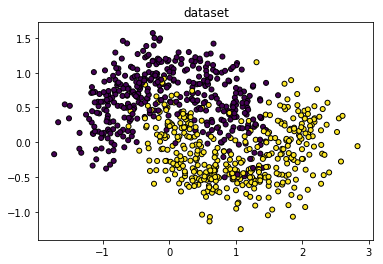

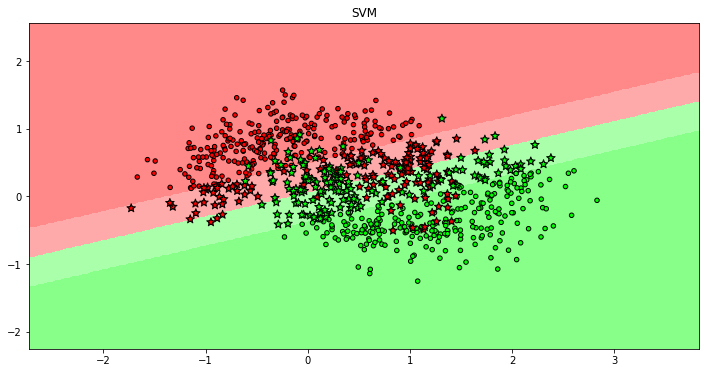

score linéar-SVM 0.83
support vector number :  [147 148]


In [45]:
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.title('dataset');

clf = svm.SVC(C=0.5, gamma='scale', kernel = "linear")    
clf.fit(X_train, y_train)
plot_classif_result_SVM(X_train,y_train,clf,"SVM")
print("score linéar-SVM %.2f" % clf.score(X_test, y_test) )
print("support vector number : ", clf.n_support_)


Observez le résultat de la classification avec un noyau
  gaussien (RBF), et l'évolution selon différentes valeurs du
  paramètre `gamma` (on gardera $C=1$).

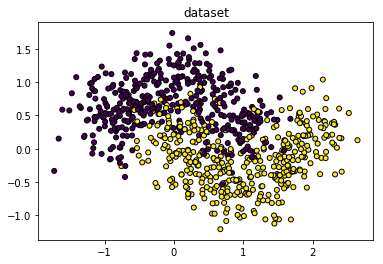

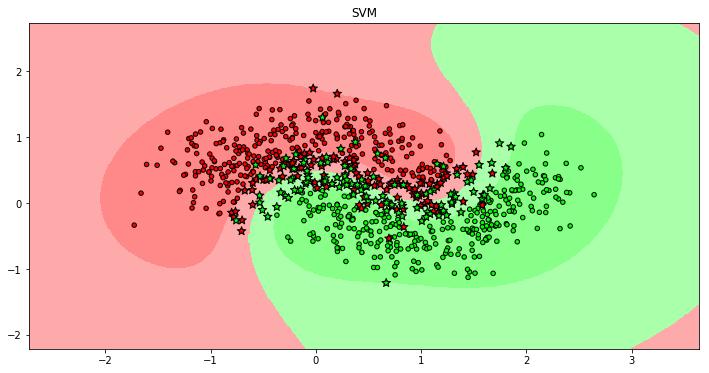

score linéar-SVM 0.89
support vector number :  [109 107]

 Gamma =  0.7734102572310696


In [26]:
# votre code ici
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.title('dataset');

clf = svm.SVC(C=1.0, gamma='scale', kernel = "rbf")    # gamma = "scale" = ~0.77 here
clf.fit(X_train, y_train)
plot_classif_result_SVM(X_train,y_train,clf,"SVM")
print("score linéar-SVM %.2f" % clf.score(X_test, y_test) )
print("support vector number : ", clf.n_support_)
print("\n Gamma = ", 1/(2*X_test.var()))


 Pour le noyau RBF et la valeur par défaut de $\gamma$, discutez l'influence de $C$. Déterminez la
  valeur optimale de l'hyperparamètre~$C$ par validation croisée
  à 5 plis (_5-fold cross validation_) sur la base d'apprentissage.


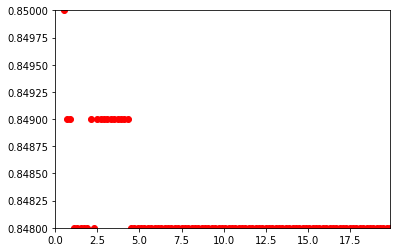

In [53]:
# votre code ici
from sklearn.model_selection import cross_val_score
import numpy

# plt.figure()
# plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
# plt.title('dataset');

clf = svm.SVC(C=1.0, gamma='scale', kernel = "rbf")    # gamma = "scale" = ~0.77 here

C_values = []
score_values = []

for i in numpy.arange(0.5, 20 ,0.2):
    clf = svm.SVC(C=i, gamma='scale', kernel = "linear")
    scores = cross_val_score(clf, X_dataset, y_dataset, cv=5) # avec les lunes
    #scores = cross_val_score(clf, X_train, Y_train, cv=5) # quand on charge make_blobs
    C_values.append(i)
    score_values.append(sum(scores)/len(scores))


plt.plot(C_values, score_values, 'ro')
plt.axis([0, max(C_values), min(score_values), max(score_values)])
plt.show()



 Pour trouver une valeur optimale aux hyperparamètres $\gamma$ et $C$ par validation croisée, on dispose de la fonction [GridSearchCV](scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) rencontrée au TP précédent.

Cette fonction va calculer (par défaut dans la version actuelle de `sklearn`) le score de 3-fold cross validation pour différentes valeurs des paramètres.
Visualisez les résultats de la cellule suivante:

C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Meilleur estimateur trouvé:
SVC(C=0.31622776601683794, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Meilleurs paramètres:
{'C': 0.31622776601683794, 'gamma': 10.0}


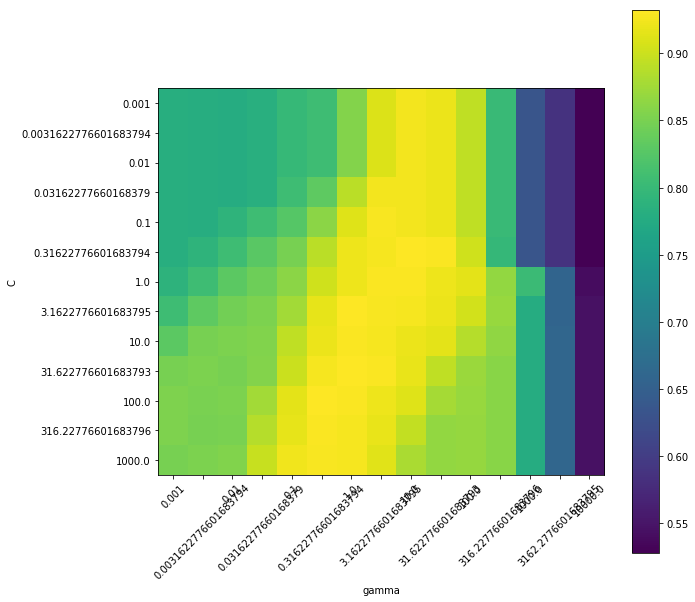

In [51]:
gamma_range=10**(np.arange(-3.,4.5,.5))
C_range=10**(np.arange(-3.,3.5,.5)) 
parameters = { 'gamma': gamma_range, 'C':C_range }
SVM = svm.SVC(kernel='rbf')
gridsearch=model_selection.GridSearchCV(SVM, parameters)
gridsearch.fit(X_train,y_train)
print("Meilleur estimateur trouvé:")
print(gridsearch.best_estimator_)
print("Meilleurs paramètres:")
print(gridsearch.best_params_)

scores = gridsearch.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
plt.figure(figsize=[10,10])
plt.imshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.colorbar()
plt.show();


Quel est le score de classification sur la base de test du meilleur classifieur identifié?

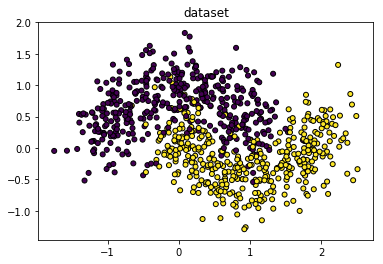

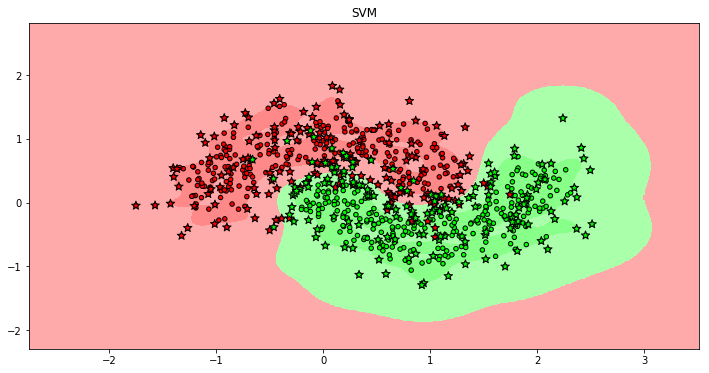

score linéar-SVM 0.93
support vector number :  [154 148]


In [52]:
# votre code ici
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.title('dataset');

clf = svm.SVC(C=0.316, gamma=10, kernel = "rbf")    # gamma = "scale" = ~0.77 here
clf.fit(X_train, y_train)
plot_classif_result_SVM(X_train,y_train,clf,"SVM")
print("score linéar-SVM %.2f" % clf.score(X_test, y_test) )
print("support vector number : ", clf.n_support_)


Comparez au résultat de la classification de la base de test par les algorithmes de classification aux 1,5, 10 plus proches voisins, à la régression logistique, au classifieur naïf de Bayes et au perceptron (dont vous aurez fixé les paramètres par `GridSearchCV`).

In [ ]:
# votre code ici
